In [191]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
tt=pd.read_csv('titanic-passengers.csv',sep=';', skipinitialspace=True)

In [192]:
tt1=tt.drop('Cabin',axis=1,inplace=False)

In [193]:
tt1.fillna(value=0,inplace=True)

In [194]:
tt1.dropna(subset=['Embarked'],inplace=True)

In [195]:

tt1['Statue'] = tt1['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
tt1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Statue
630,693,Yes,3,"Lam, Mr. Ali",male,0.0,0,0,1601,56.4958,S,Mr
407,591,No,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,S,Mr
717,478,No,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,S,Mr
577,238,Yes,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,S,Miss
427,215,No,3,"Kiernan, Mr. Philip",male,0.0,1,0,367229,7.7500,Q,Mr


In [196]:
dict = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty" ,

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
tt1=tt1.replace({"Statue": dict})


In [197]:
tt1['Family Size']=tt1['SibSp']+tt1['Parch']+1


In [198]:
tt1['Survived'] = tt1['Survived'].map({'No': 0, 'Yes': 1})


In [199]:
tt1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Statue,Family Size
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,Mrs,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,Mrs,1
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,Mrs,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,Mrs,5
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,Mrs,2


In [200]:
replacement={'male':1,'female':0}
replacement2={'Mrs':2,'Officer':3 ,'Royalty':4, 'Miss':5, 'Master':6}
replacement3={'S':7,'C':8 ,'Q':9 ,0:10}
tt1['Sex']=tt1['Sex'].replace(replacement)
tt1['Statue']=tt1['Statue'].replace(replacement2)
tt1['Embarked']=tt1['Embarked'].replace(replacement3)
tt1.sample(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Statue,Family Size
221,854,1,1,"Lines, Miss. Mary Conover",0,16.0,0,1,PC 17592,39.4000,7,5,2
446,731,1,1,"Allen, Miss. Elisabeth Walton",0,29.0,0,0,24160,211.3375,7,5,1
197,14,0,3,"Andersson, Mr. Anders Johan",1,39.0,1,5,347082,31.2750,7,2,7
401,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2,1
304,517,1,2,"Lemore, Mrs. (Amelia Milley)",0,34.0,0,0,C.A. 34260,10.5000,7,2,1
478,678,1,3,"Turja, Miss. Anna Sofia",0,18.0,0,0,4138,9.8417,7,5,1
809,126,1,3,"Nicola-Yarred, Master. Elias",1,12.0,1,0,2651,11.2417,8,6,2


In [201]:
tt1['Embarked'].unique()

array([ 7,  8,  9, 10])

In [202]:
tt1['Statue'].unique()

array([2, 5, 3, 4, 6])

In [203]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Statue       891 non-null    int64  
 12  Family Size  891 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 97.5+ KB


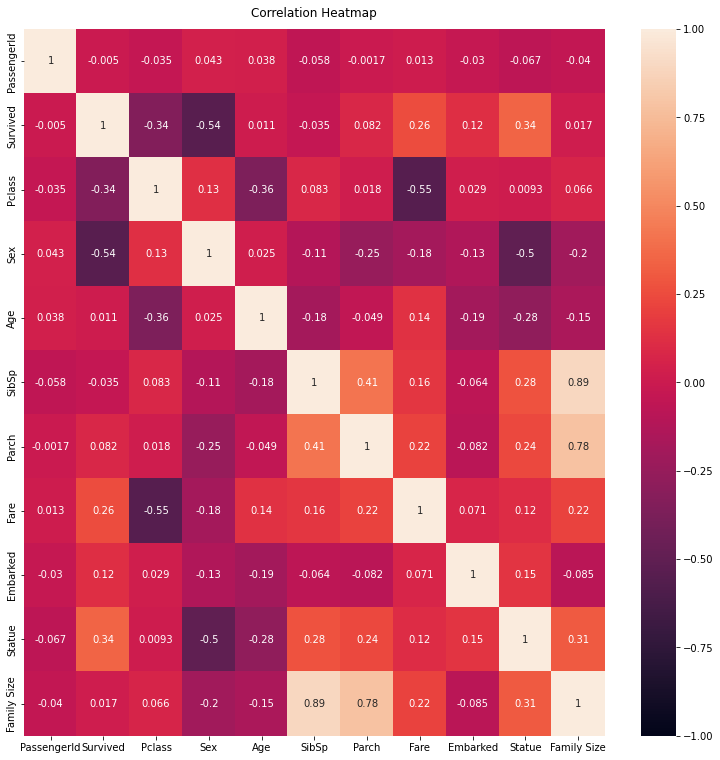

In [204]:
plt.figure(figsize=(13, 13))
heatmap = sns.heatmap(tt1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [205]:
tt1.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Statue,Family Size
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,7,2,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,7,2,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,7,2,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,7,2,5
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,7,2,2


In [206]:
x = tt1.drop(['Survived','Name','Ticket','Statue'],axis=1)
y = tt1['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.81


In [207]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])


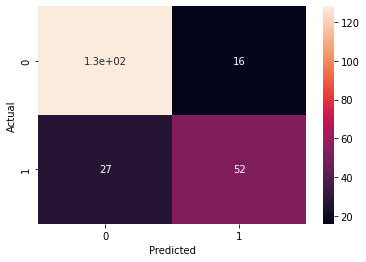

In [208]:
sns.heatmap(confusion_matrix, annot=True)

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       144
           1       0.76      0.66      0.71        79

    accuracy                           0.81       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.81      0.80       223



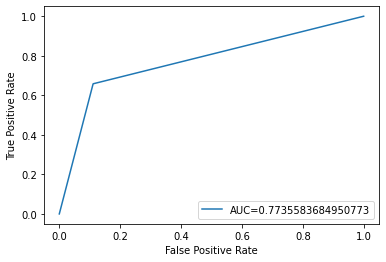

In [212]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# AUC (area under curve) is used for choosing the best model for our dataset . how : we calculate the different AUCs of
# certain algorithms and the algorithm that has an AUC closer to 1 is the best algorithm to choose for our dataset . 
# ROC curve (receiver operating characteristic curve) is used to determine the best threshhold of the sigmoid function 
# which will allow us to manipulate the results we want to get (minimize the risk of telling a patient with cancer that he's healthy) . 